In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings as fw
fw('ignore')

In [2]:
df = pd.read_csv('spam.csv', encoding= 'latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [4]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

We need to remove the last 3 columns and rename the remaining 2 columns

In [5]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [6]:
df = df.rename({'v1':'Class','v2':'SMS'}, axis=1)

In [7]:
df.head()

,Class,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe()

,Class,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df.groupby('Class').describe().T

Class                          ham  \
SMS count                     4825   
    unique                    4516   
    top     Sorry, I'll call later   
    freq                        30   

Class                                                    spam  
SMS count                                                 747  
    unique                                                653  
    top     Please call our customer service representativ...  
    freq                                                    4

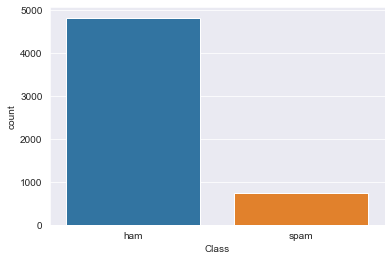

In [11]:
sns.set_style('darkgrid')
sns.countplot(x = 'Class', data = df)

In [12]:
df['length'] = df['SMS'].str.len()
df.head()

,Class,SMS,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [13]:
df.groupby('Class')['length'].describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
ham,4825.0,71.023627,58.016023,2.0,33.0,52.0,92.0,910.0
spam,747.0,138.866131,29.183082,13.0,132.5,149.0,157.0,224.0


## Data Cleansing and Preprocessing
1. Removing ,!? etc using Regex
2. Converting to lower case
3. Spliting the messages into words
4. Removing the stop words using stopwords and punctuations(if any left)
5. Applying lematization/stemming to words (excluding stop words)
6. Joining the words back into a sentence

In [14]:
import nltk
from string import punctuation
import re
from nltk.corpus import stopwords, wordnet
from nltk.stem import PorterStemmer, WordNetLemmatizer
lemma = WordNetLemmatizer()
stemmer = PorterStemmer()

In [15]:
def clean_text(t):
    t = re.sub(r'[^a-zA-Z]', ' ', t)
    t = t.lower()
    t = ' '.join([stemmer.stem(word) for word in t.split() if (word not in stopwords.words('english')) and (word not in punctuation)])
    return t

In [16]:
df['Clean_SMS'] = df['SMS'].apply(clean_text)

In [17]:
df

,Class,SMS,length,Clean_SMS
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri wkli comp win fa cup final tkt st m...
3,ham,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,161,nd time tri contact u u pound prize claim easi...
5568,ham,Will Ì_ b going to esplanade fr home?,37,b go esplanad fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",57,piti mood suggest
5570,ham,The guy did some bitching but I acted like i'd...,125,guy bitch act like interest buy someth els nex...


## Visualing Data

In [18]:
from wordcloud import WordCloud

In [19]:
spam_words = ' '.join(list(df['SMS'][df['Class'] == 'spam']))
ham_words = ' '.join(list(df['SMS'][df['Class'] == 'ham']))

Text(0.5, 0.98, 'Spam Words')

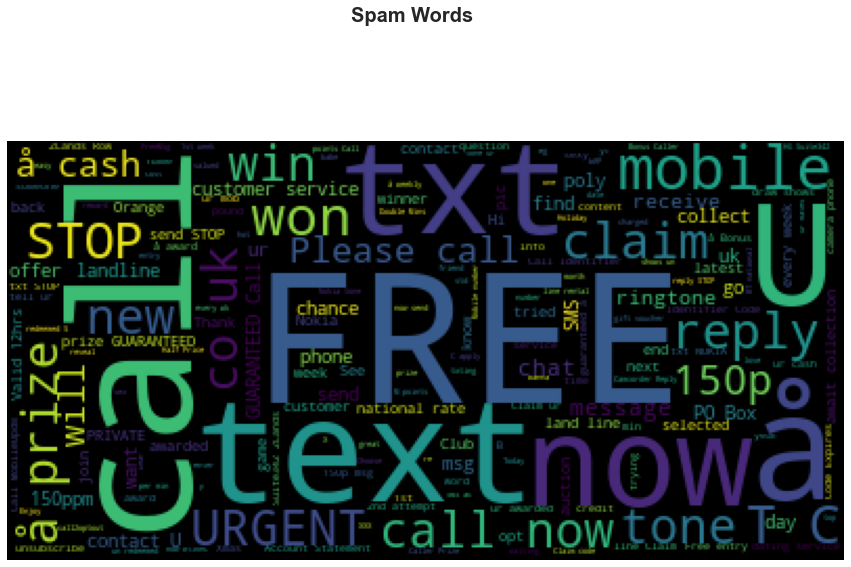

In [20]:
spam_wc = WordCloud().generate(spam_words)
plt.figure(figsize =(15, 10))
plt.imshow(spam_wc)
plt.axis('off')
plt.suptitle('Spam Words', fontweight = 'bold', fontsize = 20)

Text(0.5, 0.98, 'Ham Words')

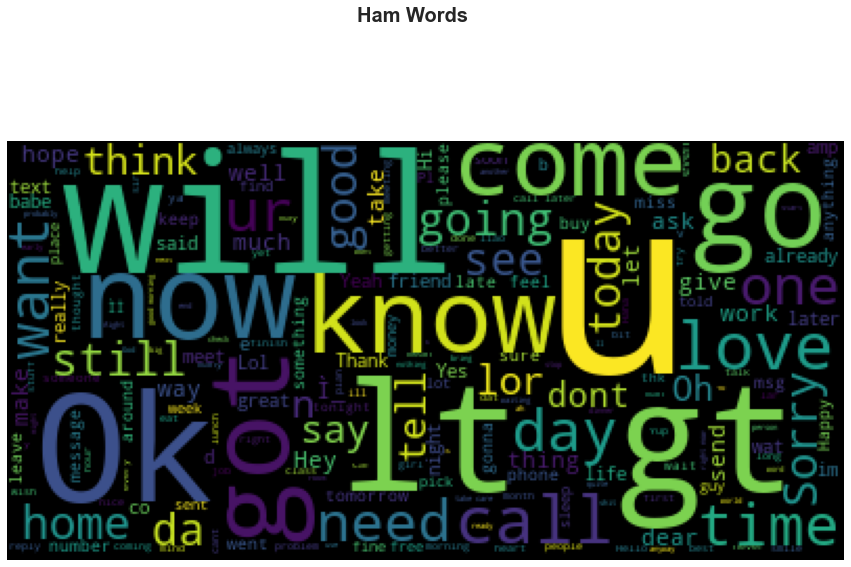

In [21]:
ham_wc = WordCloud().generate(ham_words)
plt.figure(figsize =(15, 10))
plt.imshow(ham_wc)
plt.axis('off')
plt.suptitle('Ham Words', fontweight = 'bold', fontsize = 20)

### Transforming text to feature vectors that can be used as input to estimator

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [23]:
tfidfV = TfidfVectorizer()

In [24]:
tf_idf = tfidfV.fit_transform(df['Clean_SMS'])

In [25]:
tf_df = pd.DataFrame(tf_idf.toarray(), columns = tfidfV.get_feature_names())
tf_df.head()

,aa,aah,aaniy,aaooooright,aathi,ab,abbey,abdomen,abeg,abel,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Model Building

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x = tf_df
y = df['Class']

In [28]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score
import numpy as np
import scikitplot as skplt

In [29]:
def models(model, x, y):
#     splitting the data
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)
    
    model.fit(xtrain, ytrain)
    
    ypred = model.predict(xtest)
    y_probas = model.predict_proba(xtest)
    
    cv_score = cross_val_score(model,x,y,cv= 10)
    
    print('Training Score: ', round((model.score(xtrain, ytrain))*100, 2), '%')
    print('Testing Score: ', round((model.score(xtest, ytest))*100, 2), '%')
    print("Cross Val scoe: ", round((np.mean(cv_score)*100), 2), '%')
    print(confusion_matrix(ytest, ypred))
    print(classification_report(ytest, ypred))
    skplt.metrics.plot_roc(ytest, y_probas, figsize=(12,8), title_fontsize=12, text_fontsize=16)
    plt.show()
    skplt.metrics.plot_precision_recall(ytest, y_probas, figsize=(12,8), title_fontsize=12, text_fontsize=16)
    plt.show()

Training Score:  98.59 %
Testing Score:  97.13 %
Cross Val scoe:  97.81 %
[[1188    8]
 [  32  165]]
              precision    recall  f1-score   support

         ham       0.97      0.99      0.98      1196
        spam       0.95      0.84      0.89       197

    accuracy                           0.97      1393
   macro avg       0.96      0.92      0.94      1393
weighted avg       0.97      0.97      0.97      1393



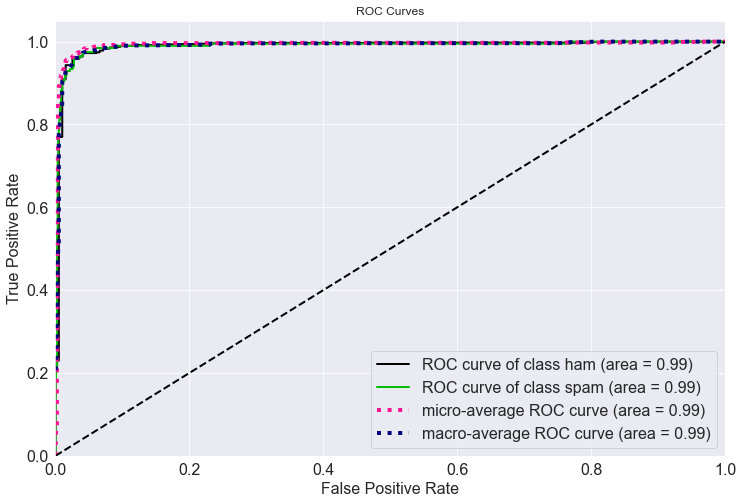

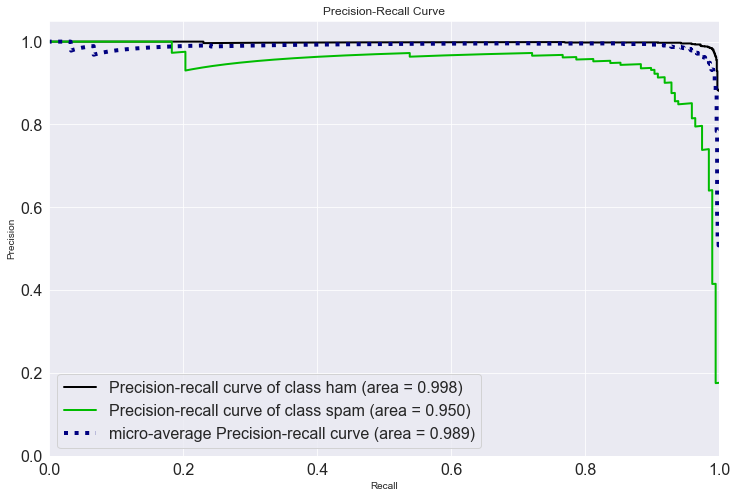

In [30]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
models(model, x, y)

In [ ]:
###### Accuracy = 